In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import os

# === Path to spectrogram images ===
data_dir = "Train_Spectrogram_Images"

# === Image Preprocessing ===
img_size = (128, 128)
batch_size = 32

# Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# === Load Pre-trained MobileNet Model ===
base_model = MobileNet(input_shape=(img_size[0], img_size[1], 3),
                       include_top=False,
                       weights='imagenet')  # Pretrained weights

# === Freeze base model layers ===
base_model.trainable = False

# === Add custom classification layers ===
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(train_generator.num_classes, activation='softmax')(x)

# === Final model ===
model = Model(inputs=base_model.input, outputs=output_layer)

# === Compile ===
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# === Train ===
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator
)

Found 5328 images belonging to 7 classes.
Found 1328 images belonging to 7 classes.


C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 67s 374ms/step - accuracy: 0.7446 - loss: 0.8277 - val_accuracy: 0.8230 - val_loss: 0.5197
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 68s 407ms/step - accuracy: 0.8113 - loss: 0.5555 - val_accuracy: 0.8110 - val_loss: 0.5453
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 68s 406ms/step - accuracy: 0.8153 - loss: 0.5595 - val_accuracy: 0.8193 - val_loss: 0.5147
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 69s 410ms/step - accuracy: 0.8276 - loss: 0.4990 - val_accuracy: 0.8230 - val_loss: 0.4968
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 69s 412ms/step - accuracy: 0.8108 - loss: 0.5359 - val_accuracy: 0.8298 - val_loss: 0.5130
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 68s 409ms/step - accuracy: 0.8160 - loss: 0.5083 - val_accuracy: 0.8230 - val_loss: 0.4950
Epoch 7/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 68s 406ms/step - accuracy: 0.8273 - loss: 0.4746 - val_accuracy: 0.8268 - val_loss: 0.5022
Epoch 8/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 69s 411ms/step - accuracy: 0.8375 -

In [3]:
model.save("Spectrogram_Images_MobbileNet_model_100epoch.h5")

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import os

Found 2450 images belonging to 7 classes.


C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step
📋 Classification Report:
                precision    recall  f1-score   support

Coarse Crackel       0.00      0.00      0.00        34
  Fine Crackle       0.48      0.36      0.41       255
        Normal       0.82      0.93      0.87      1728
       Rhonchi       0.50      0.29      0.36        14
       Stridor       0.00      0.00      0.00         2
        Wheeze       0.73      0.52      0.61       413
Wheeze+Crackle       0.00      0.00      0.00         4

      accuracy                           0.78      2450
     macro avg       0.36      0.30      0.32      2450
  weighted avg       0.76      0.78      0.76      2450



C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\AppData\Local\Temp\ipykernel_

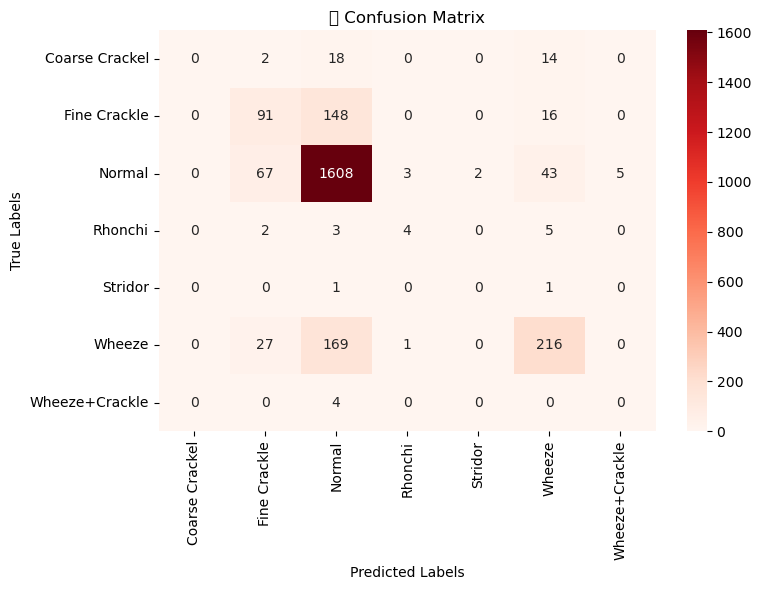

In [9]:
test_dir = "Test_Spectrogram_images"  
img_size = (128, 128)
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep label order for evaluation
)

# === 3. Load trained MobileNet-based model ===
model = tf.keras.models.load_model("Spectrogram_Images_MobbileNet_model_100epoch.h5")
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# === 5. Print Classification Report ===
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# === 6. Plot Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('🔍 Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [11]:
cm = confusion_matrix(y_true, y_pred)

In [13]:
cm

array([[   0,    2,   18,    0,    0,   14,    0],
       [   0,   91,  148,    0,    0,   16,    0],
       [   0,   67, 1608,    3,    2,   43,    5],
       [   0,    2,    3,    4,    0,    5,    0],
       [   0,    0,    1,    0,    0,    1,    0],
       [   0,   27,  169,    1,    0,  216,    0],
       [   0,    0,    4,    0,    0,    0,    0]], dtype=int64)

In [17]:
diagonal = np.diag(cm)
print(diagonal)
sum(diagonal)

[   0   91 1608    4    0  216    0]


1919

In [19]:
SE = (sum(np.diag(cm)) - cm[2][2]) / (sum(sum(cm)) - sum(cm[2]))

In [21]:
SE

0.4307479224376731

In [23]:
SP = cm[2][2] / sum(cm[2])

In [25]:
SP

0.9305555555555556

In [27]:
print('AS = ',(SE+SP)/2)

AS =  0.6806517389966144


In [29]:
print('HS = ',(2*SE*SP)/(SE+SP))

HS =  0.588898623632818


In [31]:
print('Score = ',(((SE+SP)/2)+((2*SE*SP)/(SE+SP)))/2)

Score =  0.6347751813147162
